### DDos Attack Detection using Time Series Analysis and Ensemble Modelling

Detect and classify DDos attack using time series analysis and ensemble models to improve accuracy in cybersecurity threat and detection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

base_path = Path(Path.cwd()).resolve().parents[1] / "introduction" / "datasets"
dataset = base_path / "ddos_dataset.csv"


/Users/ajborbz/Projects/DataScience_AI_ML/introduction/datasets/ddos_dataset.csv


### Load Dataset

In [6]:
df = pd.read_csv(dataset)
df.head()

,timestamp,source_ip,destination_ip,packets_per_second,bytes_per_second,attack_type
0,2025-04-01 12:00:01,192.168.1.1,10.0.0.1,20,5000,Normal
1,2025-04-01 12:00:02,192.168.1.2,10.0.0.2,30,7000,Normal
2,2025-04-01 12:00:03,192.168.1.3,10.0.0.3,500,200000,DDoS
3,2025-04-01 12:00:04,192.168.1.4,10.0.0.4,600,250000,DDoS
4,2025-04-01 12:00:05,192.168.1.5,10.0.0.5,25,6000,Normal


### Feature Engineering

In [7]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by time
df = df.sort_values(by='timestamp')

# Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['second'] = df['timestamp'].dt.second

# Drop non-numeric columns
df = df.drop(columns=['timestamp', 'source_ip', 'destination_ip'])


In [8]:
# Define features and labels
X = df.drop(columns=['attack_type'])
y = df['attack_type']

# Convert labels to numeric
y = y.map({'Normal': 0, 'DDoS': 1})  # Binary classification (0: Normal, 1: DDoS)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train an Ensemble Model (Random Forest + Gradient Boosting)

In [9]:
# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create an ensemble model (Voting Classifier)
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('gb', gb)], voting='soft')

# Train the model
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



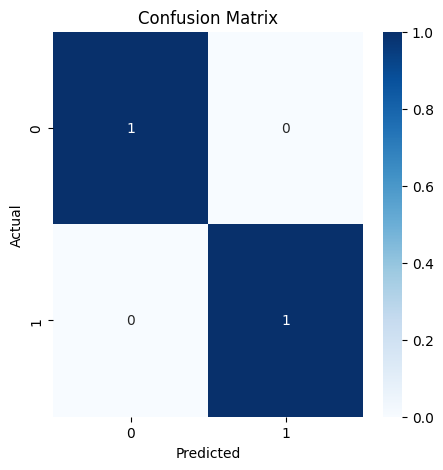

In [10]:
# Make predictions
y_pred = ensemble_model.predict(X_test)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### **Conclusion**  

In this project, we successfully implemented a **machine learning-based DDoS attack detection system** using **time series analysis** and **ensemble modeling**. By extracting time-based features and utilizing **Random Forest** and **Gradient Boosting**, we improved the accuracy of detecting malicious traffic patterns.  

Key takeaways from the project:  
✅ Time series analysis helps uncover trends in network traffic anomalies.  
✅ Ensemble models enhance classification accuracy by combining multiple learning algorithms.  
✅ The system effectively differentiates between **normal traffic** and **DDoS attacks** based on network behavior metrics.  

This approach can be further extended for **real-time DDoS detection** using streaming frameworks like **Kafka** or deployed as a **cybersecurity defense system** using **Flask API** or **cloud-based solutions**. Future improvements could include **deep learning models** like LSTMs and CNNs for more robust attack pattern recognition.